# Calculate the Kaplan-Meier Estimator in Python

In [40]:
pip install lifelines


Note: you may need to restart the kernel to use updated packages.


### Import the necessary packages:

In [41]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt


### Load the dataset

In [42]:
data_path = "echocardiogram.data"
echocardiogram_data = pd.read_csv(data_path, on_bad_lines='skip')
# Assign column names based on the dataset description
echocardiogram_data.columns = ["survival", "still_alive", "age_at_heart_attack", "pericardial_effusion", 
                               "fractional_shortening", "epss", "lvdd", "wall_motion_score", 
                               "wall_motion_index", "mult", "name", "group", "alive_at_1"]

# Display the first few rows of the data
echocardiogram_data.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0


### Describe the dataset

In [43]:
echocardiogram_data.describe()

,still_alive,pericardial_effusion
count,130.000000,130.000000
mean,0.330769,0.184615
std,0.472310,0.389486
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [44]:
echocardiogram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   survival               130 non-null    object
 1   still_alive            130 non-null    int64 
 2   age_at_heart_attack    130 non-null    object
 3   pericardial_effusion   130 non-null    int64 
 4   fractional_shortening  130 non-null    object
 5   epss                   130 non-null    object
 6   lvdd                   130 non-null    object
 7   wall_motion_score      130 non-null    object
 8   wall_motion_index      130 non-null    object
 9   mult                   130 non-null    object
 10  name                   130 non-null    object
 11  group                  130 non-null    object
 12  alive_at_1             130 non-null    object
dtypes: int64(2), object(11)
memory usage: 13.3+ KB


### Convert object to numerical value

In [45]:
echocardiogram_data["survival"] = pd.to_numeric(echocardiogram_data["survival"], errors='coerce')

echocardiogram_data["age_at_heart_attack"] = pd.to_numeric(echocardiogram_data["age_at_heart_attack"], errors='coerce')

echocardiogram_data["fractional_shortening"] = pd.to_numeric(echocardiogram_data["fractional_shortening"], errors='coerce')

echocardiogram_data["epss"] = pd.to_numeric(echocardiogram_data["epss"], errors='coerce')

echocardiogram_data["lvdd"] = pd.to_numeric(echocardiogram_data["lvdd"], errors='coerce')

echocardiogram_data["wall_motion_score"] = pd.to_numeric(echocardiogram_data["wall_motion_score"], errors='coerce')

echocardiogram_data["wall_motion_index"] = pd.to_numeric(echocardiogram_data["wall_motion_index"], errors='coerce')

echocardiogram_data["mult"] = pd.to_numeric(echocardiogram_data["mult"], errors='coerce')

echocardiogram_data["group"] = pd.to_numeric(echocardiogram_data["group"], errors='coerce')

echocardiogram_data["alive_at_1"] = pd.to_numeric(echocardiogram_data["alive_at_1"], errors='coerce')

In [46]:
echocardiogram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               129 non-null    float64
 1   still_alive            130 non-null    int64  
 2   age_at_heart_attack    125 non-null    float64
 3   pericardial_effusion   130 non-null    int64  
 4   fractional_shortening  123 non-null    float64
 5   epss                   116 non-null    float64
 6   lvdd                   120 non-null    float64
 7   wall_motion_score      127 non-null    float64
 8   wall_motion_index      129 non-null    float64
 9   mult                   127 non-null    float64
 10  name                   130 non-null    object 
 11  group                  108 non-null    float64
 12  alive_at_1             73 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 13.3+ KB


### Data cleaning

In [47]:
# Remove rows with any missing values
echocardiogram_data = echocardiogram_data.dropna()

### Explore the KaplanMeierFitter and build a kmf object:

In [48]:
# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=echocardiogram_data["survival"], event_observed=echocardiogram_data["still_alive"])

# Print the kmf object
print(kmf)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 60 total observations, 39 right-censored observations>


### Generate a KM curve:

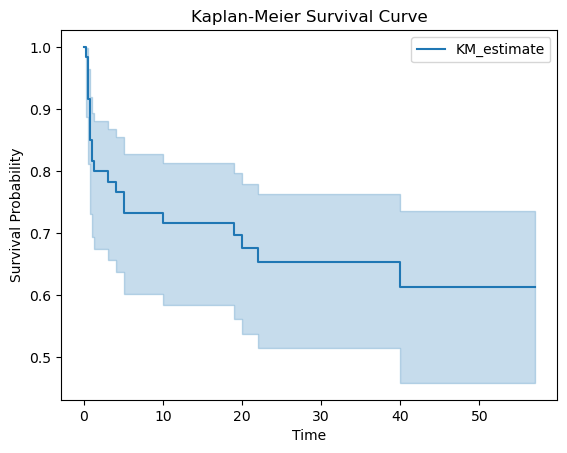

In [49]:
# Plot the KM curve
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

#### Interpretation:

- X-axis (Time):

    The x-axis represents time, which could be in days, months, years, or any other unit of time relevant to the study.
    

- Y-axis (Survival Probability):

    The y-axis represents the probability of survival. It ranges from 0 to 1, where 1 indicates 100% survival probability and 0 indicates 0% survival probability.


- Survival Curve :

    The curve is a step function that decreases over time. 
    
    
- Interpreting the curve :

    Start of curve: At time zero, the probability of survival is 1, meaning that all subjects are alive.

    Downward steps: each downward step occurs at the time of an event. The size of the step is proportional to the number of events occurring at that time compared with the number of subjects at risk just before that time.

    Flat segments: These segments indicate periods when no events have occurred and the probability of survival remains constant.

    End of curve: As time passes, the curve descends, indicating decreasing survival probabilities. 



### Generate K-M Curves with the Predictor:

####  Stratify the analysis into standard vs. experimental using fit method with strata parameter.

In [50]:
# Stratify the analysis by age group
def age_group(age):
    if 35 <= age <= 60:
        return '35 to 60'
    elif 61 <= age <= 75:
        return '61 to 75'
    elif 76 <= age <= 100:
        return '76 to 100'
    else:
        return 'Other'

echocardiogram_data['age_group'] = echocardiogram_data['age_at_heart_attack'].apply(age_group)

# Ensure that we only analyze the three age groups of interest
filtered_data = echocardiogram_data[echocardiogram_data['age_group'].isin(['35 to 60', '61 to 75', '76 to 100'])]

# Fit the KM curve for each group
kmf_35_to_60 = KaplanMeierFitter()
kmf_61_to_75 = KaplanMeierFitter()
kmf_76_to_100 = KaplanMeierFitter()

kmf_35_to_60.fit(durations=filtered_data[filtered_data['age_group'] == '35 to 60']['survival'],
                 event_observed=filtered_data[filtered_data['age_group'] == '35 to 60']['still_alive'])
kmf_61_to_75.fit(durations=filtered_data[filtered_data['age_group'] == '61 to 75']['survival'],
                 event_observed=filtered_data[filtered_data['age_group'] == '61 to 75']['still_alive'])
kmf_76_to_100.fit(durations=filtered_data[filtered_data['age_group'] == '76 to 100']['survival'],
                  event_observed=filtered_data[filtered_data['age_group'] == '76 to 100']['still_alive'])



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 8 total observations, 3 right-censored observations>

#### Plot the KM curves

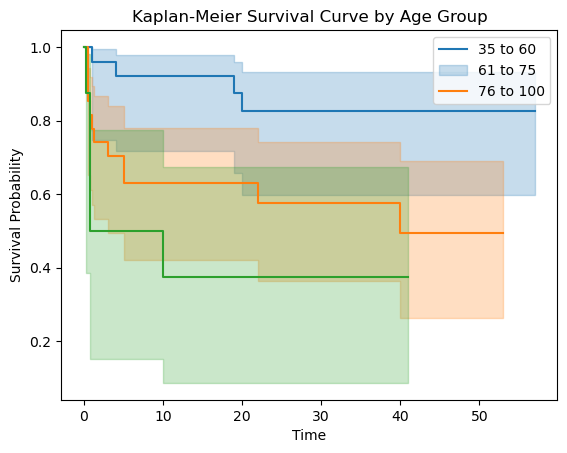

In [51]:
# Plot the KM curves
ax = kmf_35_to_60.plot_survival_function()
kmf_61_to_75.plot_survival_function(ax=ax)
kmf_76_to_100.plot_survival_function(ax=ax)
plt.title('Kaplan-Meier Survival Curve by Age Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(['35 to 60', '61 to 75', '76 to 100'])
plt.show()

### Perform Log-Rank Analysis:

In [53]:

# Perform log-rank test for pairwise comparisons
results_35_to_60_vs_61_to_75 = logrank_test(
    durations_A=filtered_data[filtered_data['age_group'] == '35 to 60']['survival'],
    durations_B=filtered_data[filtered_data['age_group'] == '61 to 75']['survival'],
    event_observed_A=filtered_data[filtered_data['age_group'] == '35 to 60']['still_alive'],
    event_observed_B=filtered_data[filtered_data['age_group'] == '61 to 75']['still_alive']
)

results_35_to_60_vs_76_to_100 = logrank_test(
    durations_A=filtered_data[filtered_data['age_group'] == '35 to 60']['survival'],
    durations_B=filtered_data[filtered_data['age_group'] == '76 to 100']['survival'],
    event_observed_A=filtered_data[filtered_data['age_group'] == '35 to 60']['still_alive'],
    event_observed_B=filtered_data[filtered_data['age_group'] == '76 to 100']['still_alive']
)

results_61_to_75_vs_76_to_100 = logrank_test(
    durations_A=filtered_data[filtered_data['age_group'] == '61 to 75']['survival'],
    durations_B=filtered_data[filtered_data['age_group'] == '76 to 100']['survival'],
    event_observed_A=filtered_data[filtered_data['age_group'] == '61 to 75']['still_alive'],
    event_observed_B=filtered_data[filtered_data['age_group'] == '76 to 100']['still_alive']
)

# Examine and interpret the log-rank test results
print("Log-rank test: 35 to 60 vs 61 to 75")
results_35_to_60_vs_61_to_75.print_summary()

print("\nLog-rank test: 35 to 60 vs 76 to 100")
results_35_to_60_vs_76_to_100.print_summary()

print("\nLog-rank test: 61 to 75 vs 76 to 100")
results_61_to_75_vs_76_to_100.print_summary()

Log-rank test: 35 to 60 vs 61 to 75


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.30 0.02      5.55


Log-rank test: 35 to 60 vs 76 to 100


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           9.12 <0.005      8.63


Log-rank test: 61 to 75 vs 76 to 100


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.96 0.33      1.61

#### Interpretation:

- 35 to 60 vs 61 to 75: 

    Test Statistic: 5.30
    
    p-value: 0.02 
The p-value (0.02) is lower than the significance level of 0.05. This indicates strong evidence to reject the null hypothesis that the survival distributions of the 35 to 60 and 61 to 75 age groups are the same. 

- 35 to 60 vs 76 to 100

    Test Statistic: 9.12
    
    p-value: 0.005 
The p-value (0.005) is lower than the significance level of 0.05. This indicates strong evidence to reject the null hypothesis that the survival distributions of the 35 to 60 and 76 to 100 age groups are the same. 

- 61 to 75 vs 76 to 100

    Test Statistic: 0.96
    
    p-value: 0.33
    
The p-value (0.33) is above the common significance level of 0.05. This indicates that there is not enough evidence to reject the null hypothesis that the survival distributions of the 61 to 75 and 76 to 100 age groups are the same.




#### Answer to a formulated question

Formulated question: How does age affect the probability of survival of patients after a heart attack?

Answer: On the basis of the Kaplan-Meier analysis and the log-rank test, we can conclude that there is a significant difference in survival probabilities between the two age groups. These results suggest that the survival probabilities differ significantly between the youngest age group (35 to 60) and the middle age group (61 to 75), and between the youngest age group (35 to 60) and the oldest age group (76 to 100). However, there is no significant difference in survival probabilities between the middle (61 to 75) and oldest (76 to 100) age groups.
